## 複数のクラスタリングを比較する

#### 株価json読みこみ、テストデータの整理
日付ごとの開始値リストを説明変数、業種を目的変数とする

In [1]:
import json

In [2]:
with open('stocks.json') as f:
    stocks=json.load(f)

In [3]:
stockdatas=[]
stockdatasY=[]
minLength=100
for stock in stocks:
    if minLength < len(stock['Open']) and stock['tag'] in [1, 3, 10]:
        stockdatas.append([stock['Open'][-minLength:],stock['tag']])
        stockdatasY.append(stock['tag'])

In [4]:
print("|業種コード|データ数|")
for i in range(15):
    print("|", i, "|", stockdatasY.count(i), "|")

|業種コード|データ数|
| 0 | 0 |
| 1 | 133 |
| 2 | 0 |
| 3 | 148 |
| 4 | 0 |
| 5 | 0 |
| 6 | 0 |
| 7 | 0 |
| 8 | 0 |
| 9 | 0 |
| 10 | 137 |
| 11 | 0 |
| 12 | 0 |
| 13 | 0 |
| 14 | 0 |


訓練データとテストデータに分割

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
traindatas, testdatas=train_test_split(stockdatas, test_size=0.2)
trainX=[]
trainY=[]

for i in traindatas:
    trainX.append(i[0])
    trainY.append(i[1])

いろいろなモデルで予測してみよう

In [7]:
from sklearn.linear_model import LogisticRegression as LRC
from sklearn.svm import SVC
from sklearn.svm import LinearSVC as LSVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.linear_model import SGDClassifier as SGDC

In [8]:
def getmodel(name):
    if name=="LRC":
        return LRC()
    
    if name=="SVC":
        return SVC()
    

    if name=="LSVC":
        return LSVC()
    
    if name=="DTC":
        return DTC()

    if name=="RFC":
        return RFC()
    
    
    if name=="KNC":
        return KNC()
    
    if name=="GNB":
        return GNB()
    
    if name=="GBC":
        return GBC()
    
    if name=="SGDC":
        return SGDC()

In [9]:
models=[
    {"name": "ロジスティック回帰", "model": "LRC"},
    {"name": "サポートベクター", "model": "SVC"},
    {"name": "線形サポートベクター", "model": "LSVC"},
    {"name": "決定木", "model": "DTC"},
    {"name": "ランダムフォレスト", "model": "RFC"},
    {"name": "k近傍法", "model": "KNC"},
    {"name": "ナイーブベイズ", "model": "GNB"},
    {"name": "勾配ブースト", "model": "GBC"},
    {"name": "確率的勾配降下法", "model": "SGDC"}
]

In [10]:
for model in models:
    traindatas, testdatas=train_test_split(stockdatas, test_size=0.2)
    trainX=[]
    trainY=[]

    for i in traindatas:
        trainX.append(i[0])
        trainY.append(i[1])

    model_pred=getmodel(model["model"])
    model_pred.fit(trainX, trainY)

    corr=0
    for testdata in testdatas:
        pred=model_pred.predict([testdata[0]])
        if pred==testdata[1]:
            corr+=1
    
    print(model["name"])
    print("正答率: ", corr/len(testdatas))

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ロジスティック回帰
正答率:  0.5714285714285714
サポートベクター
正答率:  0.38095238095238093
線形サポートベクター
正答率:  0.36904761904761907
決定木
正答率:  0.40476190476190477
ランダムフォレスト
正答率:  0.42857142857142855
k近傍法
正答率:  0.39285714285714285
ナイーブベイズ
正答率:  0.42857142857142855
勾配ブースト
正答率:  0.44047619047619047
確率的勾配降下法
正答率:  0.35714285714285715


10回予測してスコアをプロットしてみる

In [11]:
import matplotlib.pyplot as plt

In [12]:
for model in models:
    model["rates_corr"]=[]

for i in range(10):
    print(i)
    traindatas, testdatas=train_test_split(stockdatas, test_size=0.2)
    trainX=[]
    trainY=[]
    
    for i in traindatas:
        trainX.append(i[0])
        trainY.append(i[1])

    
    for model in models:
        model_pred=getmodel(model["model"])
        model_pred.fit(trainX, trainY)

        corr=0
        for testdata in testdatas:
            pred=model_pred.predict([testdata[0]])
            if pred==testdata[1]:
                corr+=1
        model["rates_corr"].append(corr/len(testdatas))

0


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


2


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


3


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


4


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


5


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


6


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


7


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9


/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


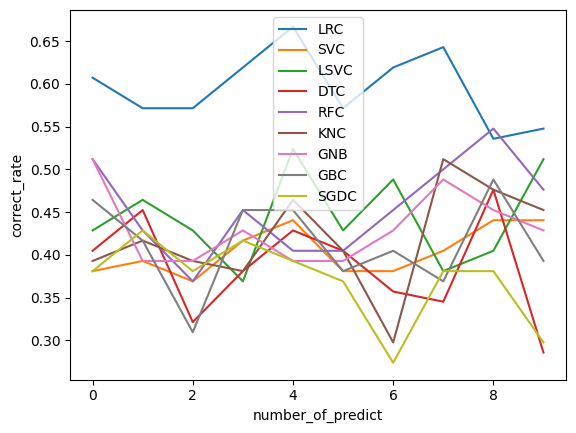

In [13]:
legend=[]
for model in models:
    plt.plot(model["rates_corr"])
    legend.append(model["model"])

plt.ylabel("correct_rate")
plt.xlabel("number_of_predict")
plt.legend(legend)
plt.show()